<h2> Ten Year Risk of Developing Coronary Heart Disease 
    
    Notebook I:

This dataset explores the various health attributes that may contribute towards developing coronary heart disease along a ten year span. The following attributes are explored:

- Male/Female: 
    - Male = 1
    - Female = 0
- Age: age at the time of the exam
- Education: 
    - Some high school = 1
    - High school or GED = 2
    - Some college or vocational school = 3
    - College = 4
- Current Smoker:
    - Nonsmoker = 0
    - Smoker = 1
- Cigarettes per day: number of cigarettes smoked per day (estimated average)
- Blood Pressure Medication:
    - Not on blood pressure medications = 0
    - On blood pressure medication = 1
- Stroke prevalence:
    - No = 0
    - Yes = 1
- Diabetes:
    - No = 0
    - Yes = 1
- Total Cholesterol levels (mg/dL)
- Systolic Blood Pressure (mmHg)
- Diastolic Blood Pressure (mmHg)
- BMI (Body Mass Index calculated as: Weight (kg)/Height(meter-squared))
- Heart Rate (Beats/min; ventricular)
- Glucose levels (mg/dL)
- Ten year coronary heart disease prediction (TenYearCHD)
    - No = 0
    - Yes = 1

<h3> Load the Data: <h3>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
df = pd.read_csv("C:/Users/apuk1/OneDrive/SCS 3253/Final/framingham.csv")

<h3> Explore the Data: <h3>

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
print(df.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


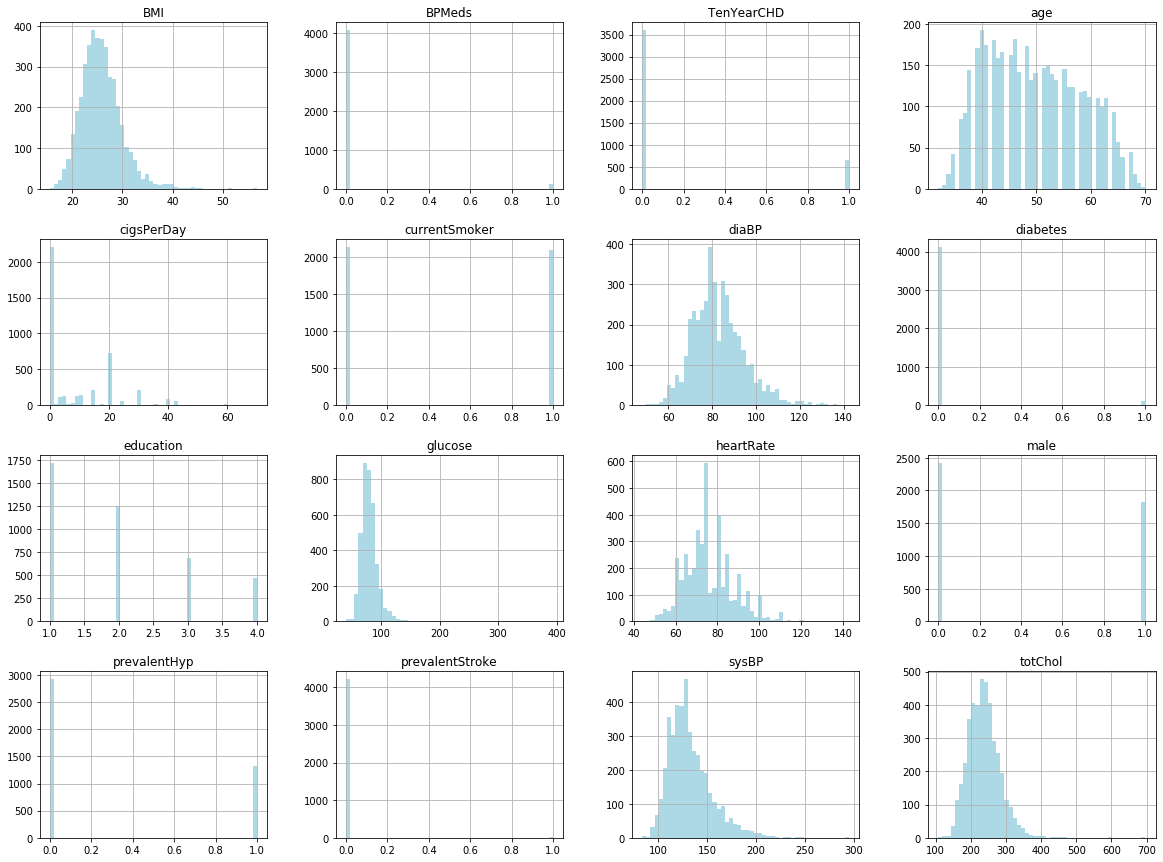

In [7]:
#General distribution of the data:
df.hist(bins=50,figsize=(20,15), color="lightblue") 
plt.show()

C:\Users\apuk1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\apuk1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\apuk1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\apuk1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


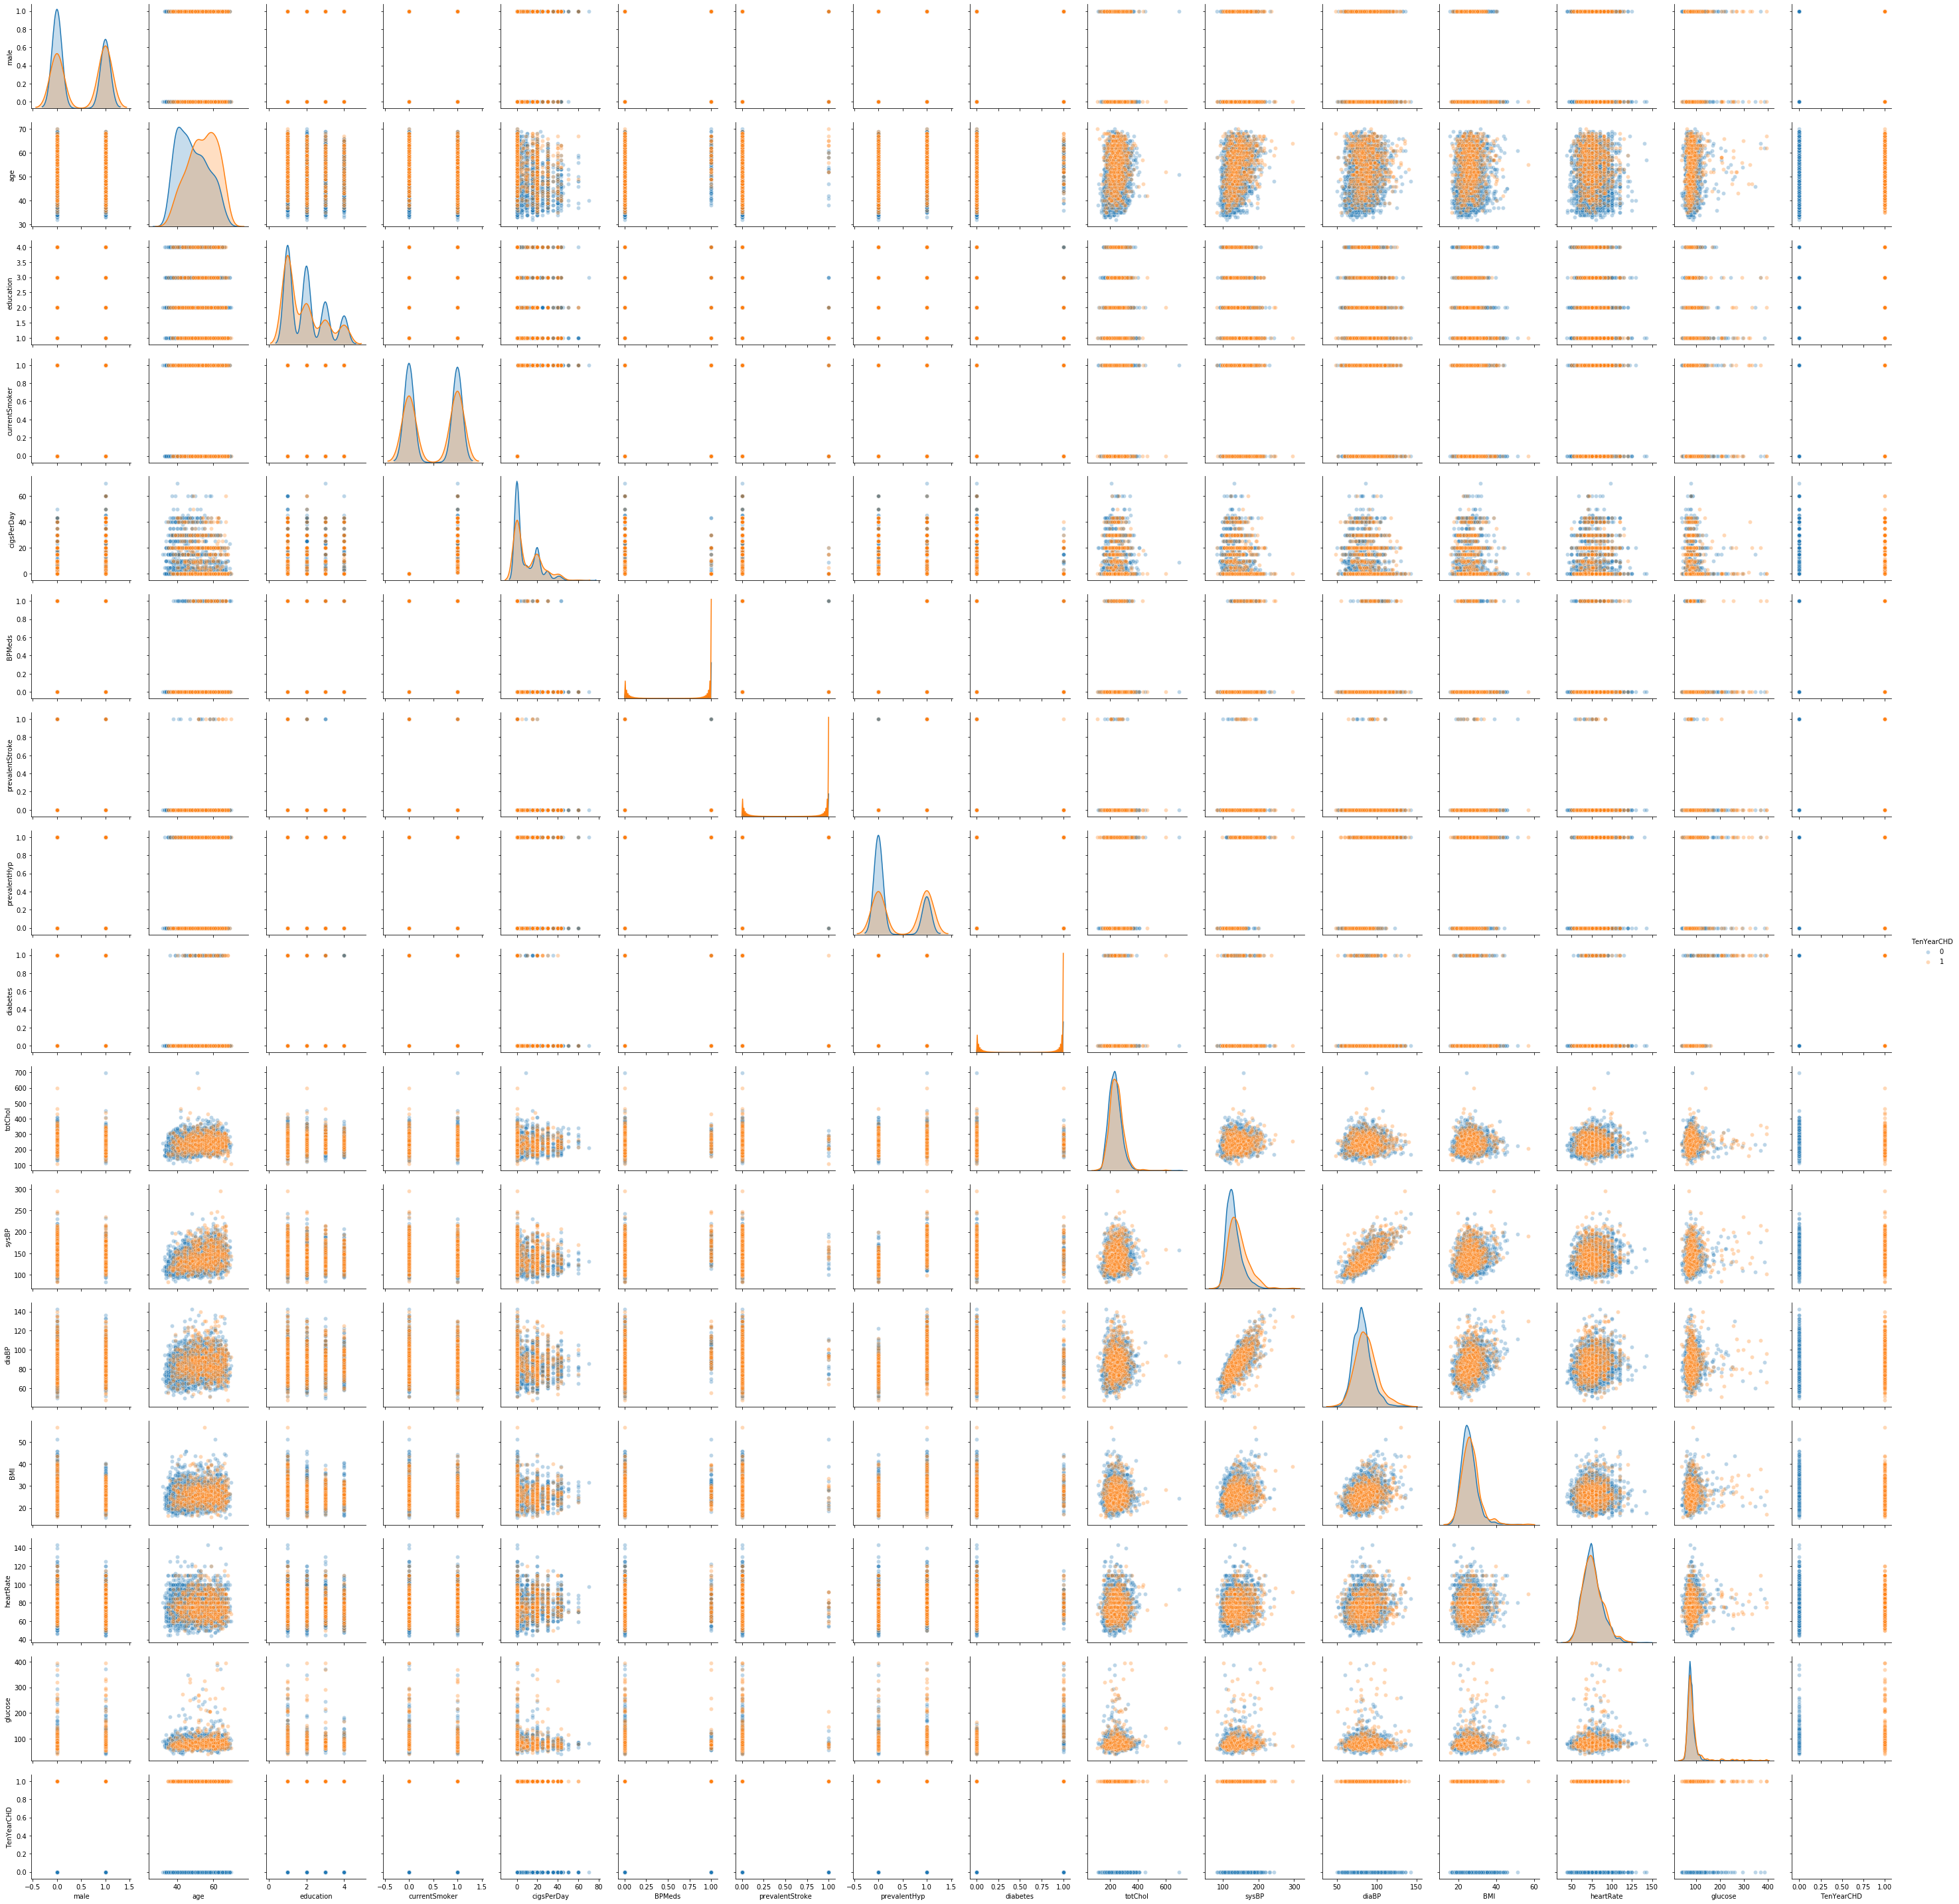

In [8]:
sns.pairplot(df[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']], hue='TenYearCHD', plot_kws=dict(alpha=0.3))

In [9]:
#Examine the correlation between each feature:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


In [10]:
#Check out the correlation between the Ten Year CHD value against all the other features in order to:
#1. Get rid of redundant features
#2. See which ones are most correlated with the target feature

corr_matrix = df.corr()
corr_matrix["TenYearCHD"].sort_values(ascending = False)

TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
male               0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
heartRate          0.022907
currentSmoker      0.019448
education         -0.054248
Name: TenYearCHD, dtype: float64

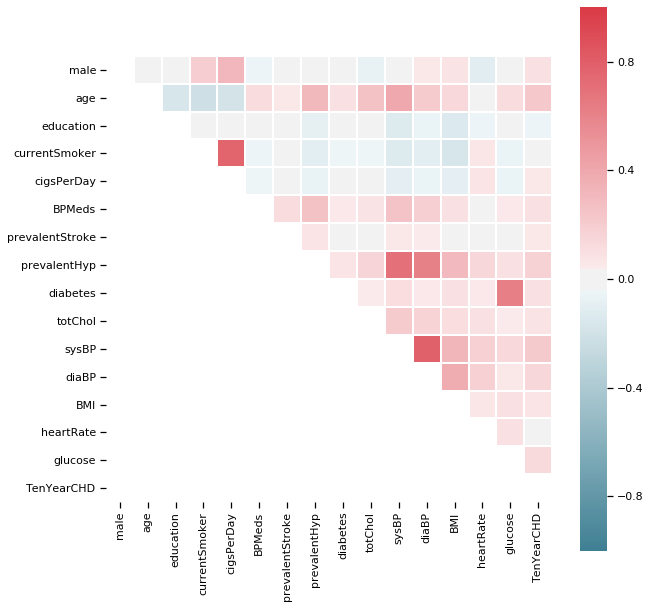

In [11]:
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

The correlations between features do not demonstrate any redundancy to be dropped.

In [12]:
#Check out the data balance for our target feature (Ten Year CHD, with 0 representing not developing coronary heart disease
#and 1 representing developing coronary heart disease after a 10 year span)
count_no = len(df[df['TenYearCHD']==1])
count_yes = len(df[df['TenYearCHD']==0])
pct_of_no = count_no/(count_no+count_yes)
print("Percentage of Ten Year Cardiac Heart Disease", str(round(pct_of_no* 100,2)) +'%')
pct_of_yes= count_yes/(count_no+count_yes)
print("Percentage of Not Having Cardiac Heart Disease", str(round(pct_of_yes*100,2)) + '%')

Percentage of Ten Year Cardiac Heart Disease 15.19%
Percentage of Not Having Cardiac Heart Disease 84.81%


C:\Users\apuk1\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


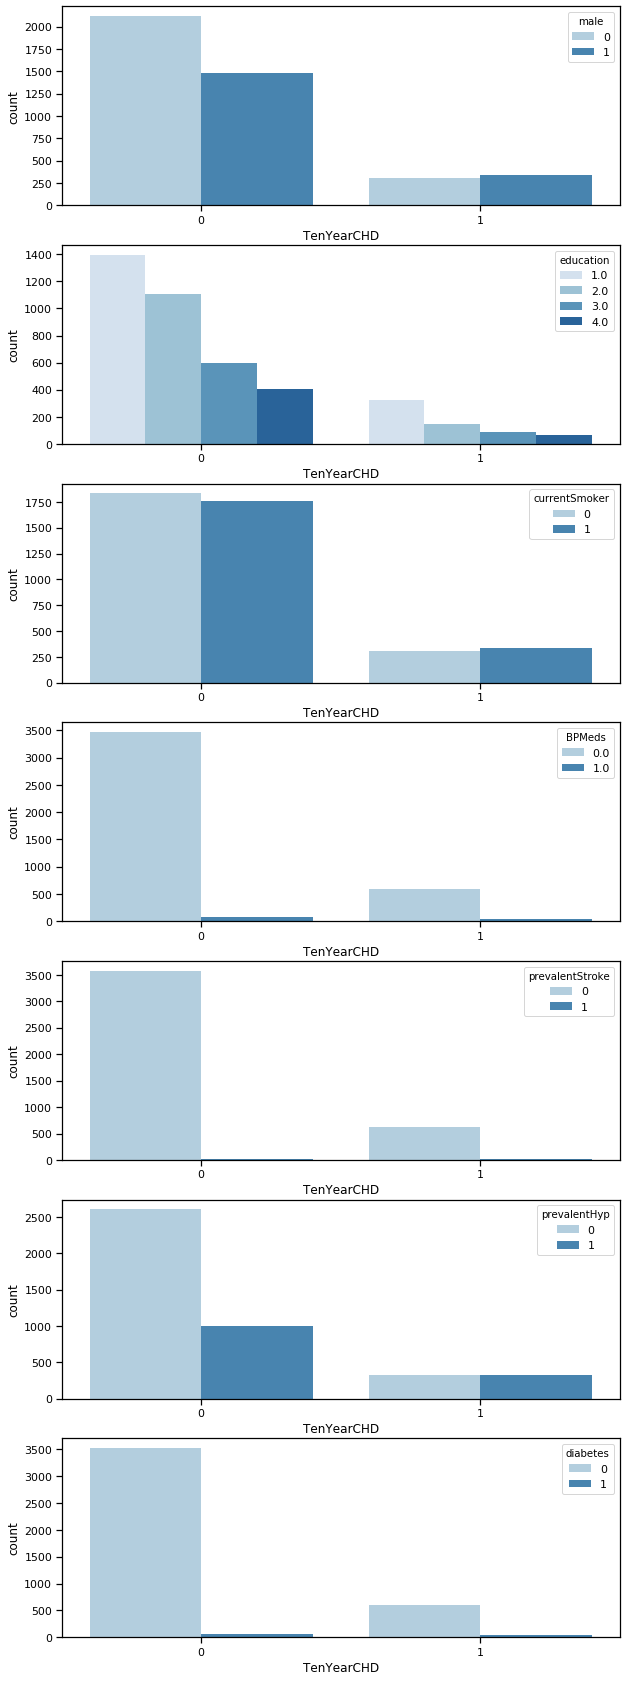

In [13]:
#Examine a little more closely the relationship between our categorical features with our target variable to see if there are
#any outstanding trends
fig, ax = plt.subplots(7,1, figsize=(10, 30))
sns.countplot(x="TenYearCHD", hue="male", palette="Blues", data=df, ax=ax[0])
sns.countplot(x="TenYearCHD", hue="education", palette="Blues", data=df, ax=ax[1])
sns.countplot(x="TenYearCHD", hue="currentSmoker", palette="Blues", data=df, ax=ax[2])
sns.countplot(x="TenYearCHD", hue="BPMeds", palette="Blues", data=df, ax=ax[3])
sns.countplot(x="TenYearCHD", hue="prevalentStroke", palette="Blues", data=df, ax=ax[4])
sns.countplot(x="TenYearCHD", hue="prevalentHyp", palette="Blues", data=df, ax=ax[5])
sns.countplot(x="TenYearCHD", hue="diabetes", palette="Blues", data=df, ax=ax[6])
fig.show()

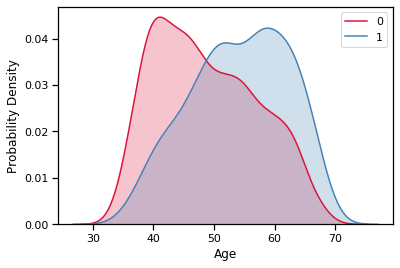

In [14]:
#Examine a little more closely the relationship between our numerical features with our target variable to see if there are
#any outstanding trends
sns.kdeplot(df.loc[(df['TenYearCHD']==0), 
            'age'], color='crimson', shade=True, Label=0) 
  
sns.kdeplot(df.loc[(df['TenYearCHD']==1),  
            'age'], color='steelblue', shade=True, Label=1) 
  
plt.xlabel('Age') 
plt.ylabel('Probability Density') 
plt.show()

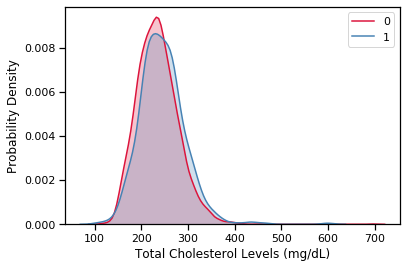

In [15]:
sns.kdeplot(df.loc[(df['TenYearCHD']==0), 
            'totChol'], color='crimson', shade=True, Label=0) 
  
sns.kdeplot(df.loc[(df['TenYearCHD']==1),  
            'totChol'], color='steelblue', shade=True, Label=1) 
  
plt.xlabel('Total Cholesterol Levels (mg/dL)') 
plt.ylabel('Probability Density') 
plt.show()

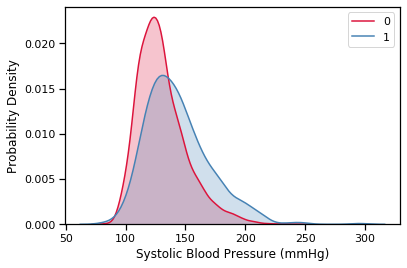

In [16]:
sns.kdeplot(df.loc[(df['TenYearCHD']==0), 
            'sysBP'], color='crimson', shade=True, Label=0) 
  
sns.kdeplot(df.loc[(df['TenYearCHD']==1),  
            'sysBP'], color='steelblue', shade=True, Label=1) 
  
plt.xlabel('Systolic Blood Pressure (mmHg)') 
plt.ylabel('Probability Density') 
plt.show()

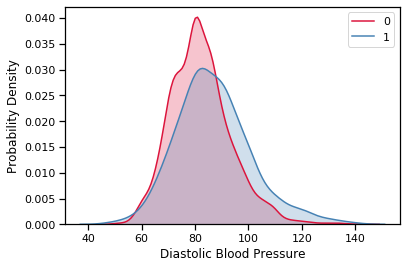

In [17]:
sns.kdeplot(df.loc[(df['TenYearCHD']==0), 
            'diaBP'], color='crimson', shade=True, Label=0) 
  
sns.kdeplot(df.loc[(df['TenYearCHD']==1),  
            'diaBP'], color='steelblue', shade=True, Label=1) 
  
plt.xlabel('Diastolic Blood Pressure') 
plt.ylabel('Probability Density') 
plt.show()

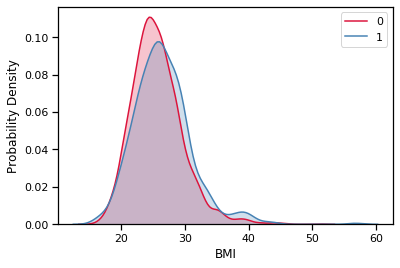

In [18]:
sns.kdeplot(df.loc[(df['TenYearCHD']==0), 
            'BMI'], color='crimson', shade=True, Label=0) 
  
sns.kdeplot(df.loc[(df['TenYearCHD']==1),  
            'BMI'], color='steelblue', shade=True, Label=1) 
  
plt.xlabel('BMI') 
plt.ylabel('Probability Density') 
plt.show()

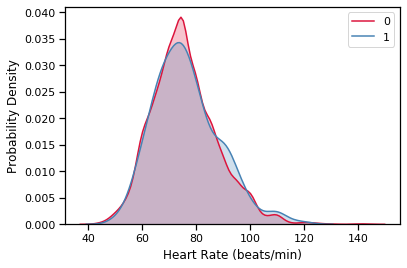

In [19]:
sns.kdeplot(df.loc[(df['TenYearCHD']==0), 
            'heartRate'], color='crimson', shade=True, Label=0) 
  
sns.kdeplot(df.loc[(df['TenYearCHD']==1),  
            'heartRate'], color='steelblue', shade=True, Label=1) 
  
plt.xlabel('Heart Rate (beats/min)') 
plt.ylabel('Probability Density') 
plt.show()

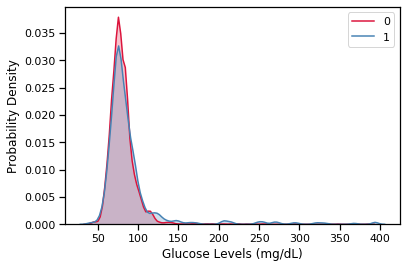

In [20]:
sns.kdeplot(df.loc[(df['TenYearCHD']==0), 
            'glucose'], color='crimson', shade=True, Label=0) 
  
sns.kdeplot(df.loc[(df['TenYearCHD']==1),  
            'glucose'], color='steelblue', shade=True, Label=1) 
  
plt.xlabel('Glucose Levels (mg/dL)') 
plt.ylabel('Probability Density') 
plt.show()

The data above demonstrates missing values for seven of our features: education, number of cigarettes per day, BP Meds, total cholesterol levels, BMI, heart rate, and glucose levels. These will be altered to so that numerical features with missing values will be replaced with the median, and categorical features with missing values replaced with the most frequent value.

From the correlations, we can also see the strongest correlations with features expected to have a higher correlation with one another:
- Number of cigarettes and being classified as a smoker 
- Diastolic and systolic blood pressure
- Systolic blood pressure and Hypertension prevalence
- Diastolic blood pressure and Hypertension prevalence
- Glucose levels and diabetes

In examining the correlations between features and our target variables, the strongest correlations are systolic and diastolic blood pressure as well as prevalence of hypertension, in which they have positive correlations as would be expected.

With regards to the target variable, presence of coronary heart disease, based off of the numerical features, we can see that the risk increases with predominantly a larger proportion of individuals developing coronary heart disease after age 50, having a systolic blood pressure above 150 mmHg and having a diastolic blood pressure above 90 mmHg.

From the above data, we can see that we need to:
- Add in values for missing data for Education, Cigs per day, BP Meds, Total Cholesterol, BMI, Heart Rate, and Glucose
- Scale and standardize the data to centre the data
- Encode the categorical variables using one-hot encoding so that they all have a similar scale

<h3> Scrub the Data: <h3>

<h4> Split the data into training and a test set: <h4>

In [21]:
X = df.drop("TenYearCHD", axis = 1)
y = df["TenYearCHD"].copy()
print(X.shape)
print(y.shape)

(4240, 15)
(4240,)


In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(X_test.shape)
print(y_test.shape)

print(f"Train with {X_train.shape[0]} samples and test with {X_test.shape[0]} samples.")

(3392, 15)
(848, 15)
(848, 15)
(848,)
Train with 3392 samples and test with 848 samples.


In [23]:
#Create a dataset with only numerical features and one with categorical features
df_num = X_train.drop(["male", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"], axis=1)

num_attribs = list(df_num) 
cat_attribs = ["male", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]

num_pipeline = Pipeline([('Imputer', SimpleImputer(strategy="median")),('StandardScaler', StandardScaler()),])
cat_pipeline = Pipeline([('Imputer', SimpleImputer(strategy="most_frequent")), ('OneHotEncoder', OneHotEncoder()),])

In [24]:
#Final and prepared datasets ready for modeling:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),])

In [25]:
X_train = full_pipeline.fit_transform(X_train)
print(X_train.shape)

X_test = full_pipeline.transform(X_test)
print(X_test.shape)

(3392, 24)
(848, 24)


Since the data is unbalanced with regards to the target feature, we will oversample the marginalized class to see how this affects the performance of our models:

Class 0 (No Coronary Heart Disease) 3596
Class 1 (Has Coronary Heart Disease): 644
Proportion: 5.58 : 1


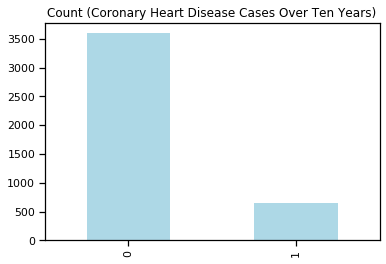

In [26]:
target_count = df.TenYearCHD.value_counts()
print('Class 0 (No Coronary Heart Disease)', target_count[0])
print('Class 1 (Has Coronary Heart Disease):', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

plt.savefig('Class Count')
target_count.plot(kind='bar', title='Count (Coronary Heart Disease Cases Over Ten Years)', color="lightblue")

In [27]:
# Class count
count_class_0, count_class_1 = df.TenYearCHD.value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = df[df['TenYearCHD'] == 0]
df_class_1 = df[df['TenYearCHD'] == 1]

3596 644


Random over-sampling:
1    3596
0    3596
Name: TenYearCHD, dtype: int64


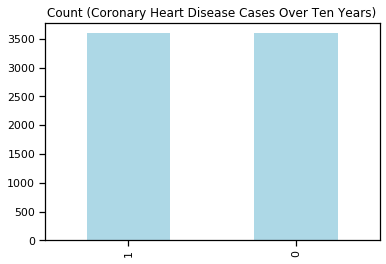

In [28]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.TenYearCHD.value_counts())

df_over.TenYearCHD.value_counts().plot(kind='bar', title='Count (Coronary Heart Disease Cases Over Ten Years)', color="lightblue")

In [29]:
df_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7192 entries, 0 to 2298
Data columns (total 16 columns):
male               7192 non-null int64
age                7192 non-null int64
education          7009 non-null float64
currentSmoker      7192 non-null int64
cigsPerDay         7155 non-null float64
BPMeds             7082 non-null float64
prevalentStroke    7192 non-null int64
prevalentHyp       7192 non-null int64
diabetes           7192 non-null int64
totChol            7095 non-null float64
sysBP              7192 non-null float64
diaBP              7192 non-null float64
BMI                7125 non-null float64
heartRate          7187 non-null float64
glucose            6574 non-null float64
TenYearCHD         7192 non-null int64
dtypes: float64(9), int64(7)
memory usage: 955.2 KB


In [30]:
X_over = df_over.drop("TenYearCHD", axis = 1)
y_over = df_over["TenYearCHD"].copy()
X_over.shape

(7192, 15)

In [31]:
# Split the data
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2)

In [32]:
print(X_train_over.shape)
print(X_test_over.shape)
print(f"Train with {X_train_over.shape[0]} samples and test with {X_test_over.shape[0]} samples.")

(5753, 15)
(1439, 15)
Train with 5753 samples and test with 1439 samples.


In [33]:
#Create a dataset with only numerical features and one with categorical features
df_num_over = X_train_over.drop(["male", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"], axis=1)

num_attribs_over = list(df_num_over) 
cat_attribs_over = ["male", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]

num_pipeline_over = Pipeline([('Imputer', SimpleImputer(strategy="median")),('StandardScaler', StandardScaler()),])
cat_pipeline_over = Pipeline([('Imputer', SimpleImputer(strategy="most_frequent")), ('OneHotEncoder', OneHotEncoder()),])

In [34]:
#Final and prepared datasets ready for modeling:
full_pipeline_over = ColumnTransformer([
        ("num", num_pipeline_over, num_attribs_over),
        ("cat", cat_pipeline_over, cat_attribs_over),])

In [35]:
X_train_over = full_pipeline_over.fit_transform(X_train_over)
print(X_train_over.shape)

X_test_over = full_pipeline_over.transform(X_test_over)
print(X_test_over.shape)

(5753, 24)
(1439, 24)


We now have our two data sets, one with the data as is before balancing our classes for the target variable (X_train, y_train, etc.) and the other set having a balanced class set for the target variable acheived through oversampling (X_train_over, y_train_over, etc.).